# IE0005 Lecture 3

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
pkmndata = pd.read_csv('pokemonData.csv')
pkmndata.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Categorical Data

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


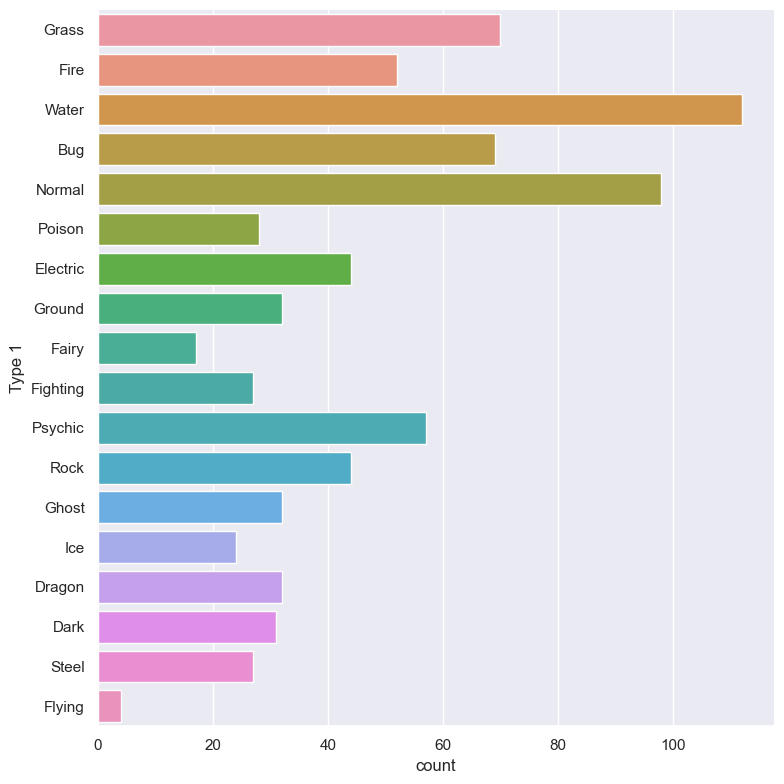

In [3]:
# Pokemons of each Primary Type
print(pkmndata["Type 1"].value_counts())
sb.catplot(y = "Type 1", data = pkmndata, kind = "count", height = 8)

## Classification

#### Simple Decision Tree

Response Variable : **Legendary**     
Predictor Feature : **Total**    

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [5]:
# Recall the Legendary-Total Dataset
legnd = pd.DataFrame(pkmndata['Legendary'])   # Response
total = pd.DataFrame(pkmndata['Total'])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(total, legnd, test_size = 0.25)

In [6]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

DecisionTreeClassifier(max_depth=2)

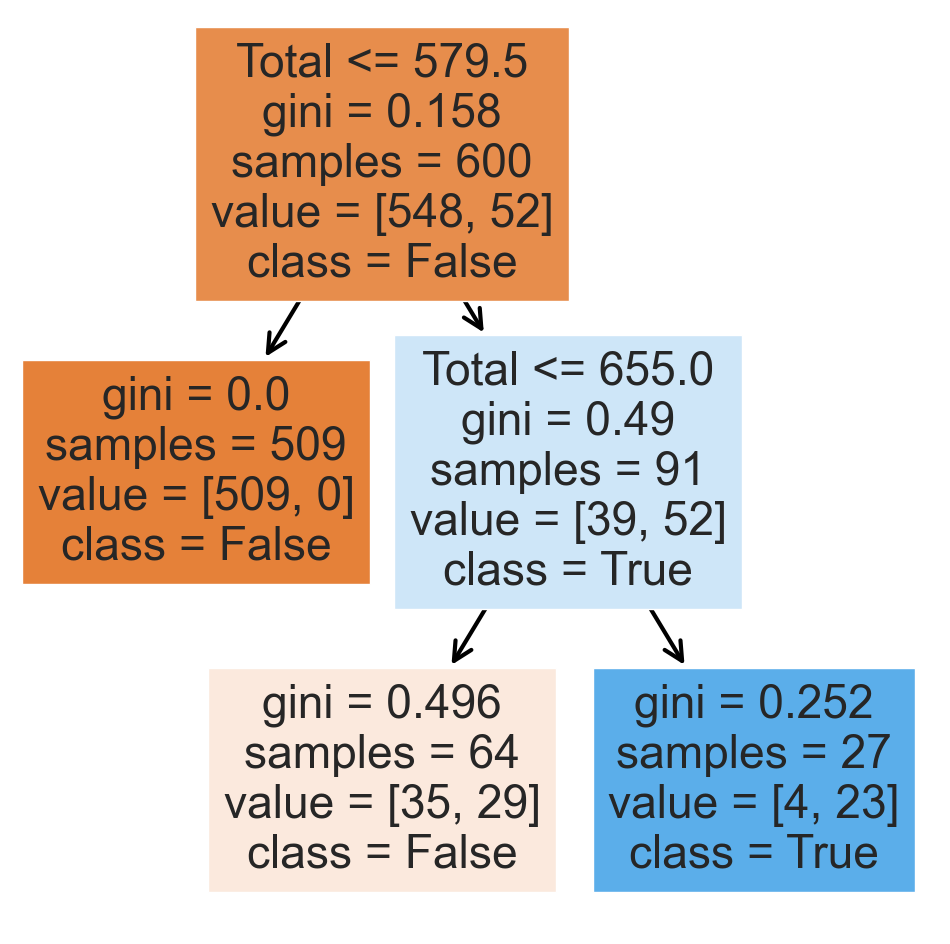

In [7]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = list(X_train.columns),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

Decision of Partition depends on the Gini Index (metric of misclassification)

Decision question: "Total <= xxx"

Gini: probability of misclassification, smaller means more confident
$$ 
Gini = \frac{𝑥}{𝑛}  (1 − \frac{𝑥}{𝑛})  +   \frac{y}{𝑛}  (1 − \frac{y}{𝑛})\\ 
\   \\
= 1 - \left\{(\frac{𝑥}{𝑛})^2+(\frac{y}{𝑛})^2 \right\}
$$

Samples: Number of training samples in that node

value: Ground-truth number of samples in each class in that node

class: Class prediction (choose the largest class from value)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.945

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.955



<AxesSubplot: >

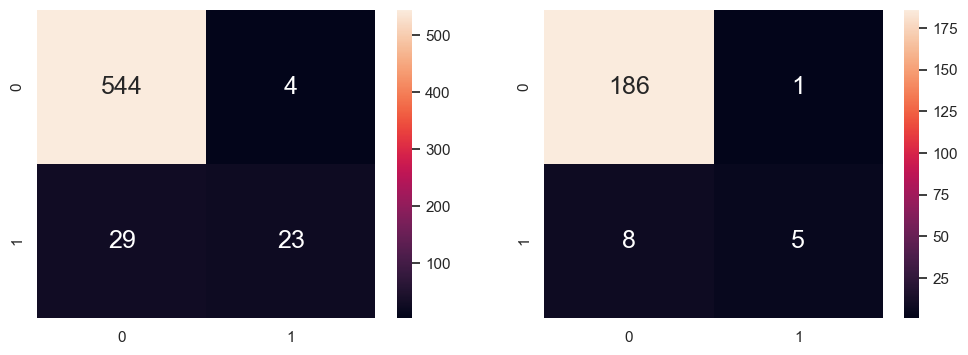

In [8]:
# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

Confusion matrix: ground truth x predicted

$P$ = number of positive samples, $N$ = number of negative samples

PP : Prediction as True, PN : Prediction as False

TP 	: 	True predicted as True, TPR = $\frac{TP}{P}$ = recall/sensitivity/hit rate

TN 	: 	False predicted as False, TNR = $\frac{TN}{N}$ = specificity/selectivity

FN 	: 	True predicted as False, FNR = $\frac{FN}{P}$ = miss rate

FP 	: 	False predicted as True, FPR = $\frac{FP}{N}$ = false alarm rate

Accuracy = $\frac{TP + TN}{P + N}$

Precision = $\frac{TP}{PP}$


AUC: Area under ROC curve

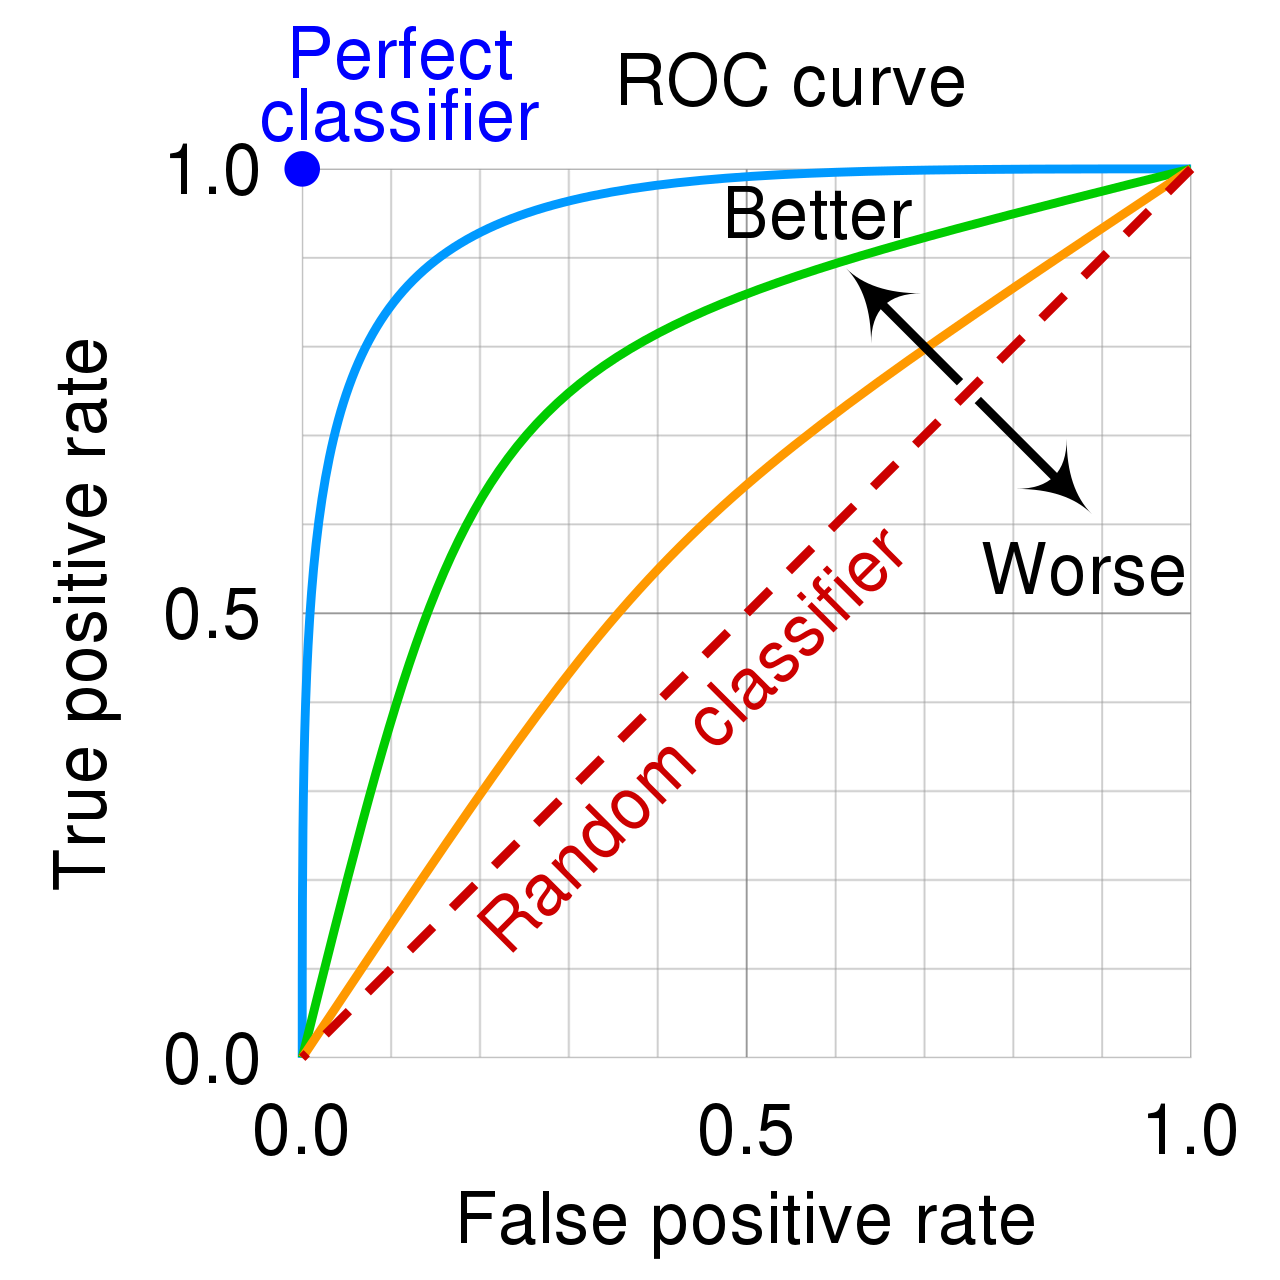

<p style="font-family: times, serif; font-size:10pt; font-style:italic">https://commons.wikimedia.org/wiki/File:Roc_curve.svg drawn by CMG Lee based on http://commons.wikimedia.org/wiki/File:roc-draft-xkcd-style.svg</p>

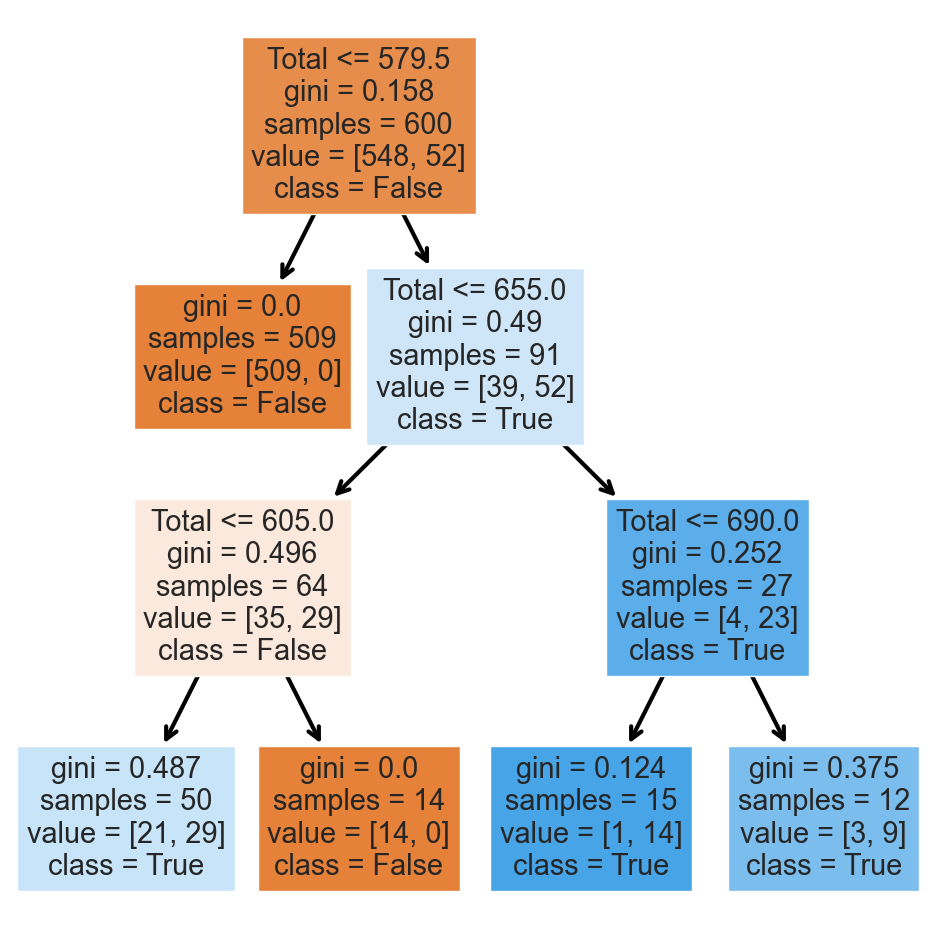

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9583333333333334

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.96



<AxesSubplot: >

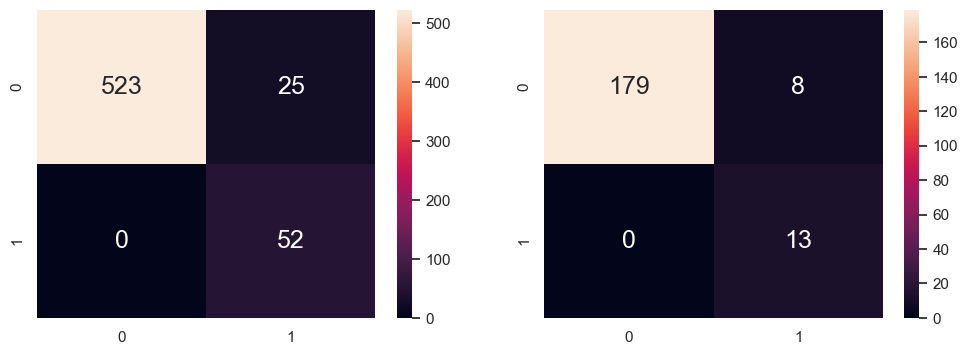

In [9]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 3)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = list(X_train.columns),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


#### Multi-Variate Classification Tree

We will start by setting up a Multi-Variate Classification problem.   

Response Variable : **Legendary**     
Predictor Feature : **Total, HP, Attack, Defense**    

In [10]:
# Extract Response and Predictors
y = pd.DataFrame(pkmndata["Legendary"])
X = pd.DataFrame(pkmndata[["Total", "HP", "Attack", "Defense"]])

# Import train_test_split from sklearn
from sklearn.model_selection import train_test_split

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)


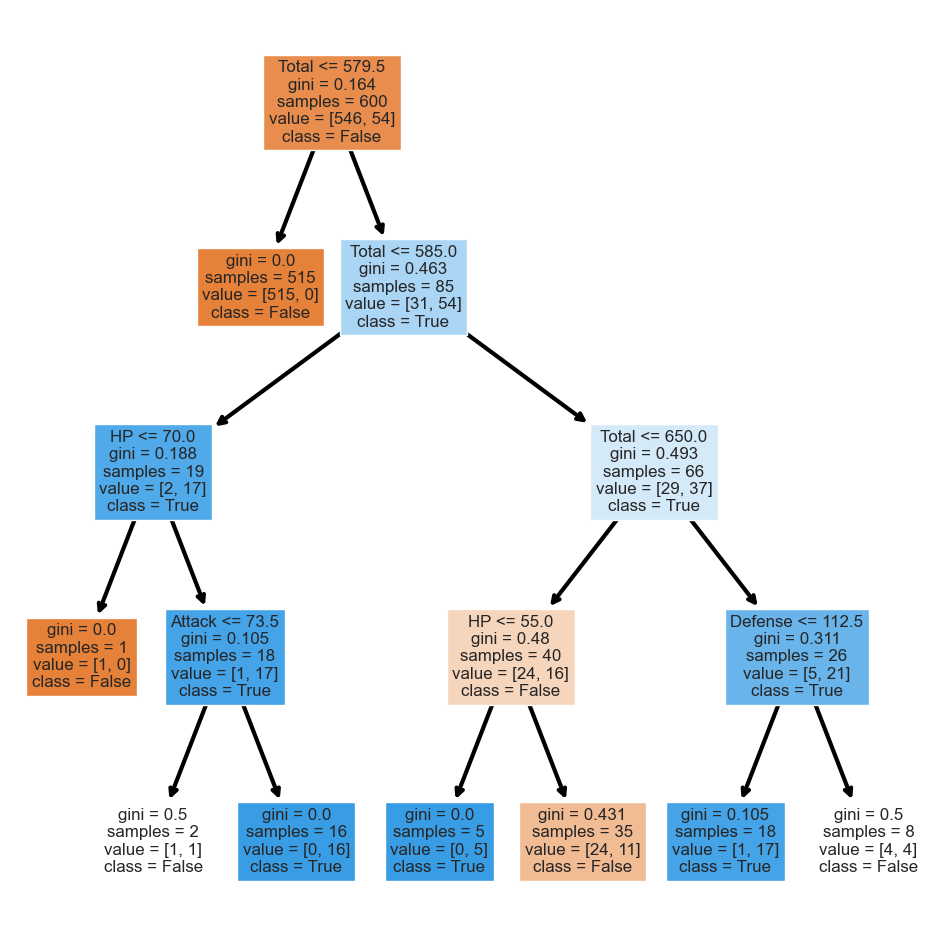

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.9716666666666667

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.96



<AxesSubplot: >

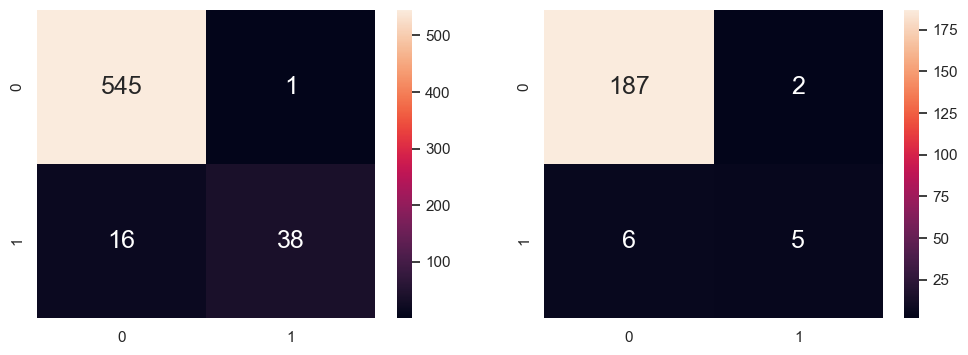

In [11]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth =4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(12, 12))
out = plot_tree(dectree, 
          feature_names = list(X_train.columns),
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])